In [65]:
!pip install xgboost

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [67]:
#from google.colab import files
#uploaded = files.upload()

In [68]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [69]:
df.columns = ['date','open','high','low','close','adj close','volume']

In [70]:
df.shape

(2713, 7)

In [71]:
df.describe()

,open,high,low,close,adj close,volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2713 non-null   object 
 1   open       2713 non-null   float64
 2   high       2713 non-null   float64
 3   low        2713 non-null   float64
 4   close      2713 non-null   float64
 5   adj close  2713 non-null   float64
 6   volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [73]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj close    0
volume       0
dtype: int64

In [74]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day.astype('int')
df['month'] = df['date'].dt.month.astype('int')
df['year'] = df['date'].dt.year.astype('int')
df['weekday'] = df['date'].dt.day_name()
df

,date,open,high,low,close,adj close,volume,day,month,year,weekday
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17,9,2014,Wednesday
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18,9,2014,Thursday
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19,9,2014,Friday
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20,9,2014,Saturday
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21,9,2014,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,15,2,2022,Tuesday
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,16,2,2022,Wednesday
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813,17,2,2022,Thursday
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,18,2,2022,Friday


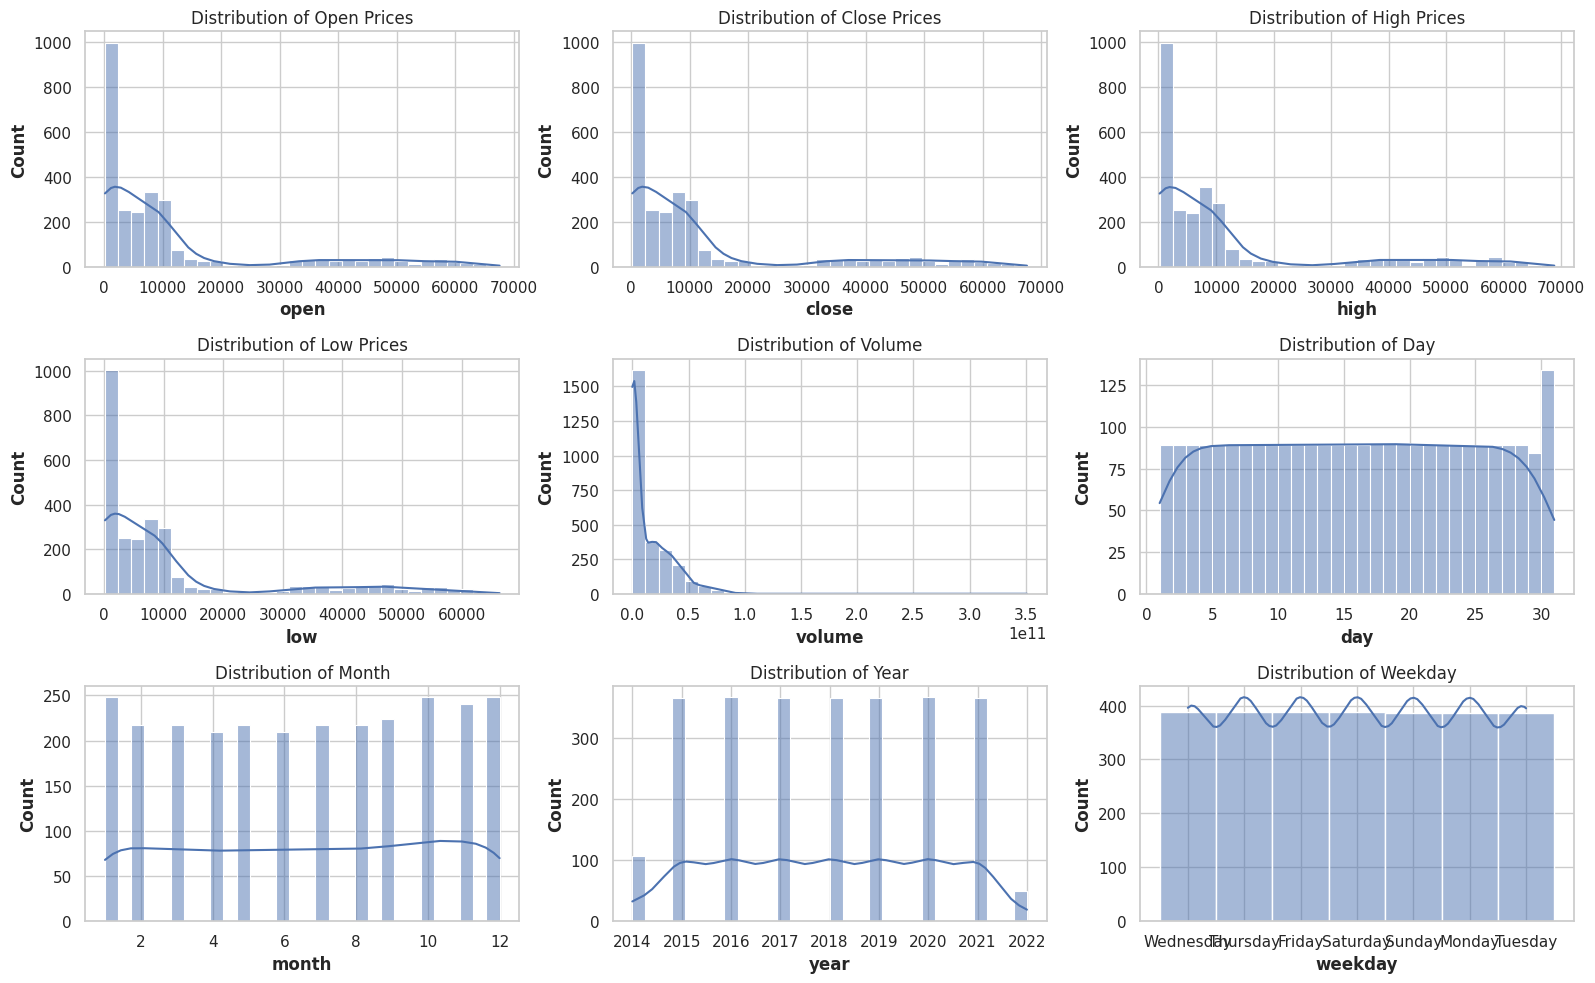

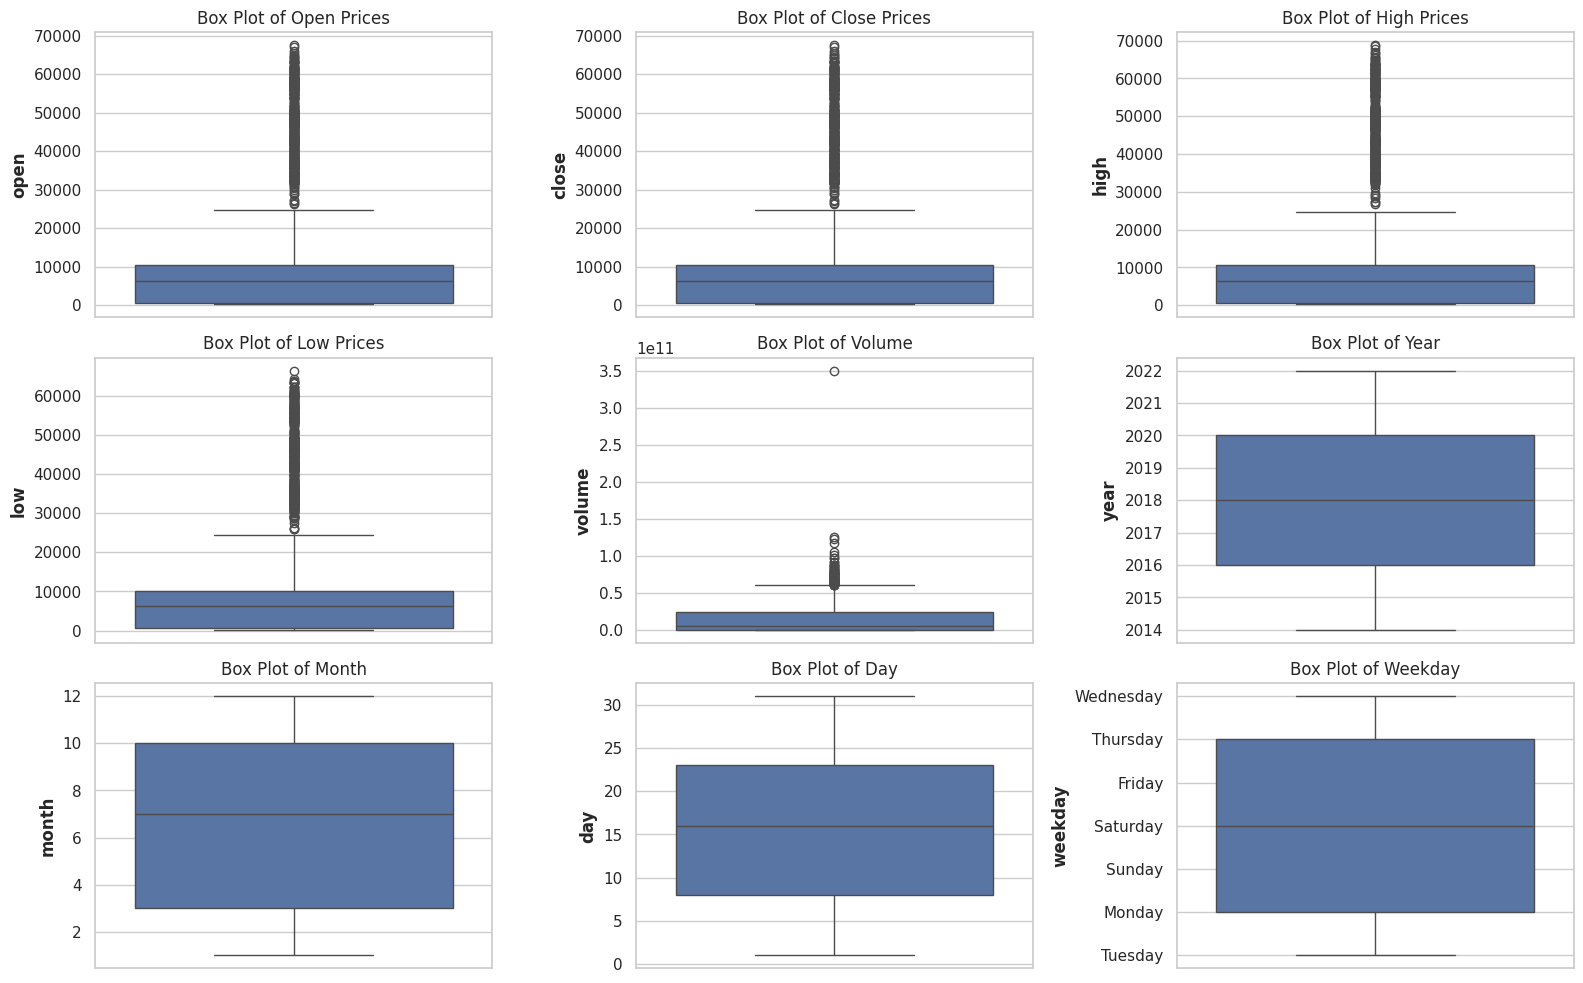

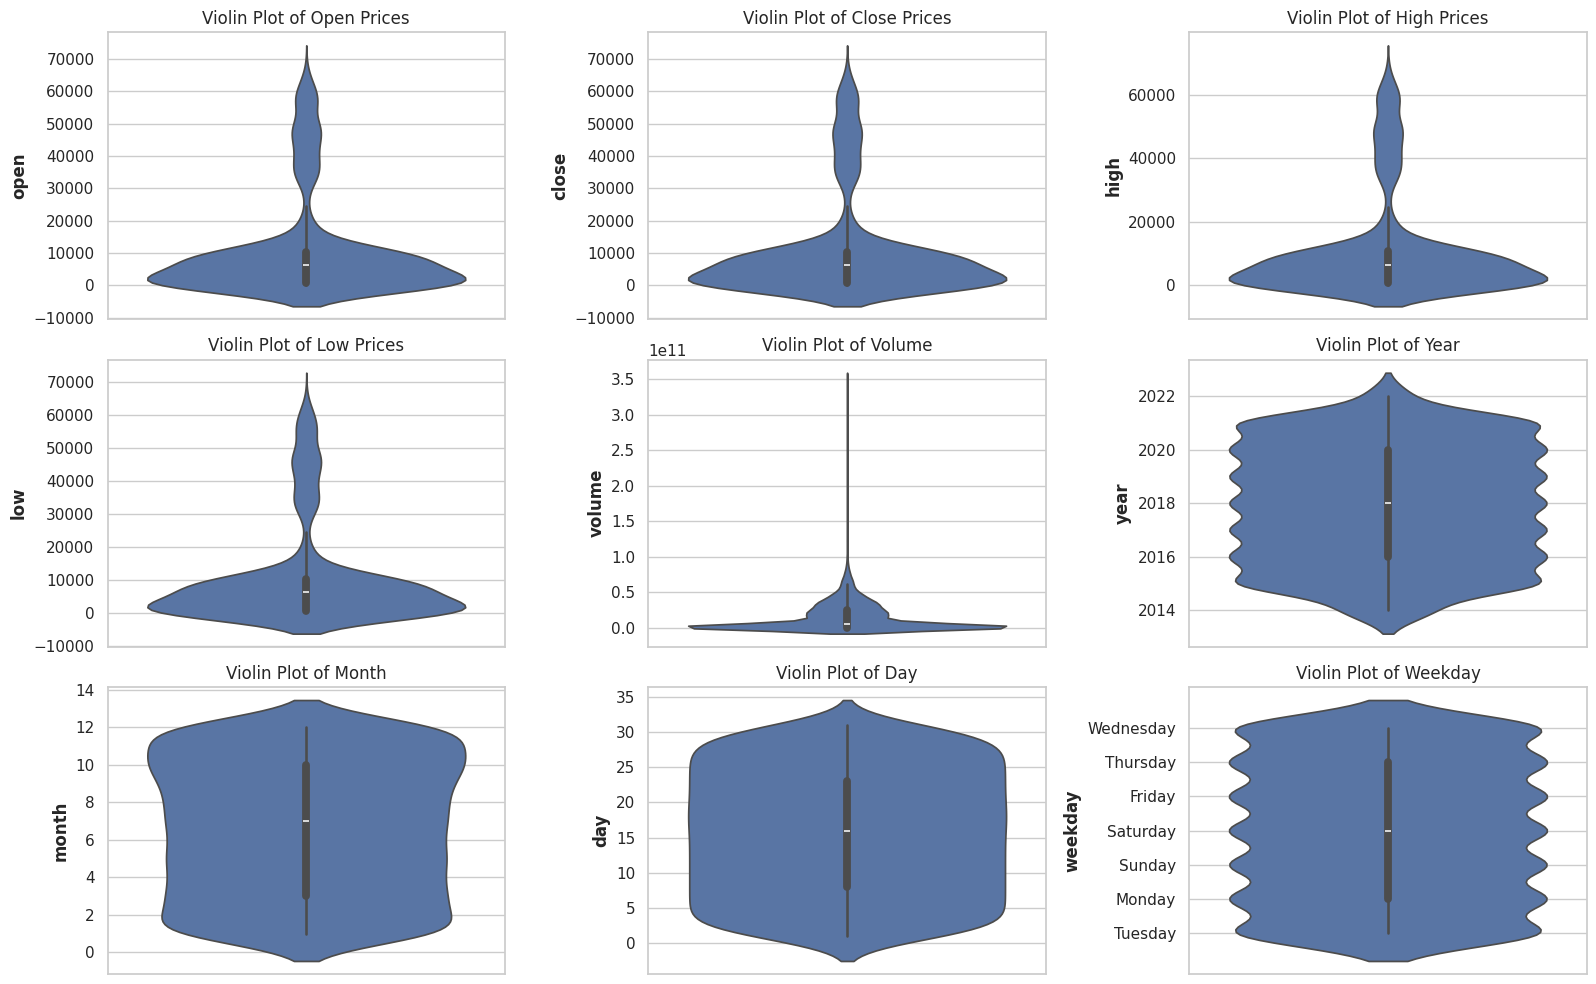

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Create subplots for histograms
plt.subplot(3, 3, 1)
sns.histplot(df['open'], kde=True, bins=30)
plt.title('Distribution of Open Prices')

plt.subplot(3, 3, 2)
sns.histplot(df['close'], kde=True, bins=30)
plt.title('Distribution of Close Prices')

plt.subplot(3, 3, 3)
sns.histplot(df['high'], kde=True, bins=30)
plt.title('Distribution of High Prices')

plt.subplot(3, 3, 4)
sns.histplot(df['low'], kde=True, bins=30)
plt.title('Distribution of Low Prices')

plt.subplot(3, 3, 5)
sns.histplot(df['volume'], kde=True, bins=30)
plt.title('Distribution of Volume')

plt.subplot(3, 3, 6)
sns.histplot(df['day'], kde=True, bins=30)
plt.title('Distribution of Day')

plt.subplot(3, 3, 7)
sns.histplot(df['month'], kde=True, bins=30)
plt.title('Distribution of Month')

plt.subplot(3, 3, 8)
sns.histplot(df['year'], kde=True, bins=30)
plt.title('Distribution of Year')

plt.subplot(3, 3, 9)
sns.histplot(df['weekday'], kde=True, bins=30)
plt.title('Distribution of Weekday')

plt.tight_layout()
plt.show()

# Create subplots for box plots
plt.figure(figsize=(16, 10))

plt.subplot(3, 3, 1)
sns.boxplot(y=df['open'])
plt.title('Box Plot of Open Prices')

plt.subplot(3, 3, 2)
sns.boxplot(y=df['close'])
plt.title('Box Plot of Close Prices')

plt.subplot(3, 3, 3)
sns.boxplot(y=df['high'])
plt.title('Box Plot of High Prices')

plt.subplot(3, 3, 4)
sns.boxplot(y=df['low'])
plt.title('Box Plot of Low Prices')

plt.subplot(3, 3, 5)
sns.boxplot(y=df['volume'])
plt.title('Box Plot of Volume')

plt.subplot(3, 3, 6)
sns.boxplot(y=df['year'])
plt.title('Box Plot of Year')

plt.subplot(3, 3, 7)
sns.boxplot(y=df['month'])
plt.title('Box Plot of Month')

plt.subplot(3, 3, 8)
sns.boxplot(y=df['day'])
plt.title('Box Plot of Day')

plt.subplot(3, 3, 9)
sns.boxplot(y=df['weekday'])
plt.title('Box Plot of Weekday')

plt.tight_layout()
plt.show()

# Create subplots for violin plots
plt.figure(figsize=(16, 10))

plt.subplot(3, 3, 1)
sns.violinplot(y=df['open'])
plt.title('Violin Plot of Open Prices')

plt.subplot(3, 3, 2)
sns.violinplot(y=df['close'])
plt.title('Violin Plot of Close Prices')

plt.subplot(3, 3, 3)
sns.violinplot(y=df['high'])
plt.title('Violin Plot of High Prices')

plt.subplot(3, 3, 4)
sns.violinplot(y=df['low'])
plt.title('Violin Plot of Low Prices')

plt.subplot(3, 3, 5)
sns.violinplot(y=df['volume'])
plt.title('Violin Plot of Volume')

plt.subplot(3, 3, 6)
sns.violinplot(y=df['year'])
plt.title('Violin Plot of Year')

plt.subplot(3, 3, 7)
sns.violinplot(y=df['month'])
plt.title('Violin Plot of Month')

plt.subplot(3, 3, 8)
sns.violinplot(y=df['day'])
plt.title('Violin Plot of Day')

plt.subplot(3, 3, 9)
sns.violinplot(y=df['weekday'])
plt.title('Violin Plot of Weekday')

plt.tight_layout()
plt.show()

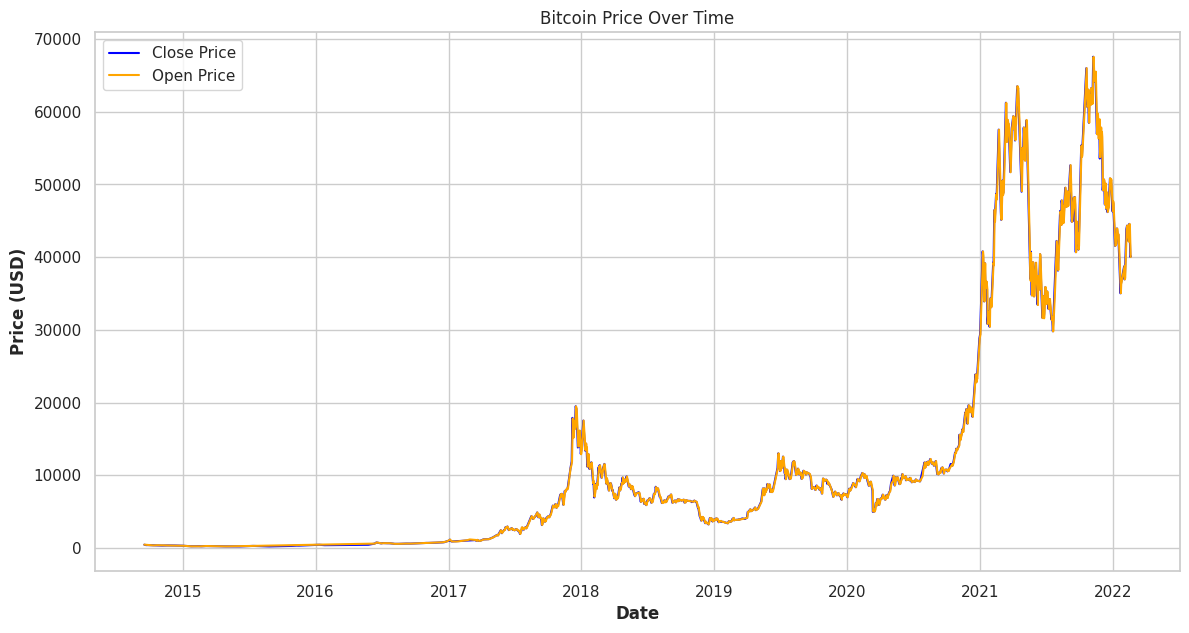

In [76]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['open'], label='Open Price', color='orange')
#plt.plot(df['date'], df['high'], label='High Price', color='green')
#plt.plot(df['date'], df['low'], label='Low Price', color='red')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()

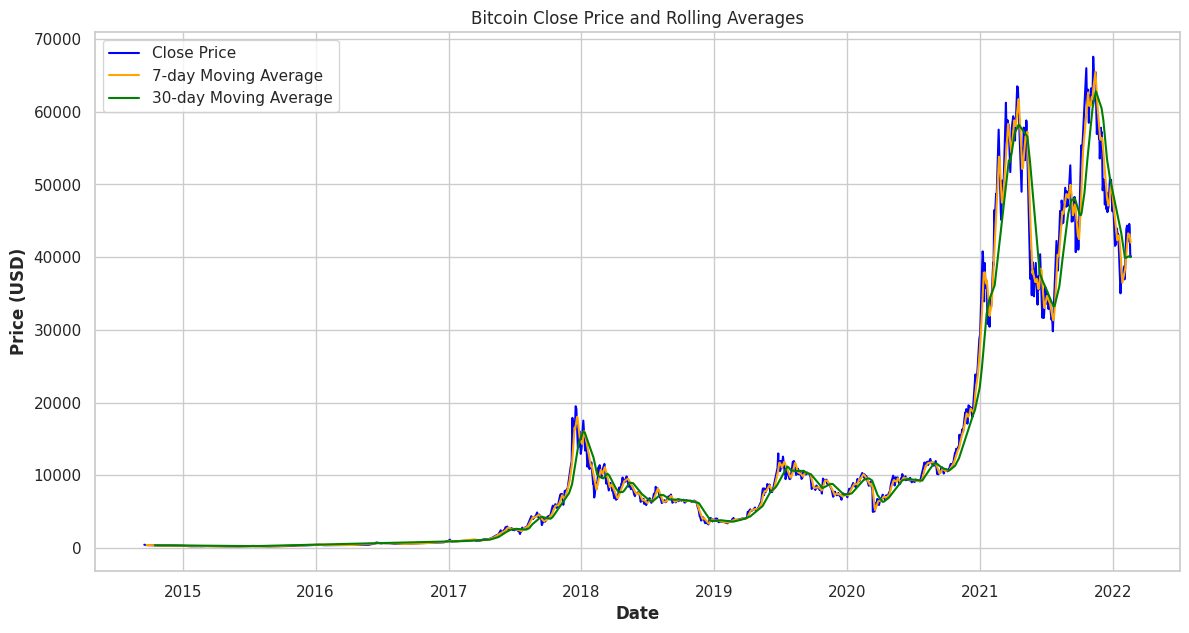

In [77]:
# 7-day Moving Average
df['7-day MA'] = df['close'].rolling(window=7).mean()

# 30-day Moving Average
df['30-day MA'] = df['close'].rolling(window=30).mean()

# Plotting the close price and rolling averages
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['7-day MA'], label='7-day Moving Average', color='orange')
plt.plot(df['date'], df['30-day MA'], label='30-day Moving Average', color='green')
plt.title('Bitcoin Close Price and Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()

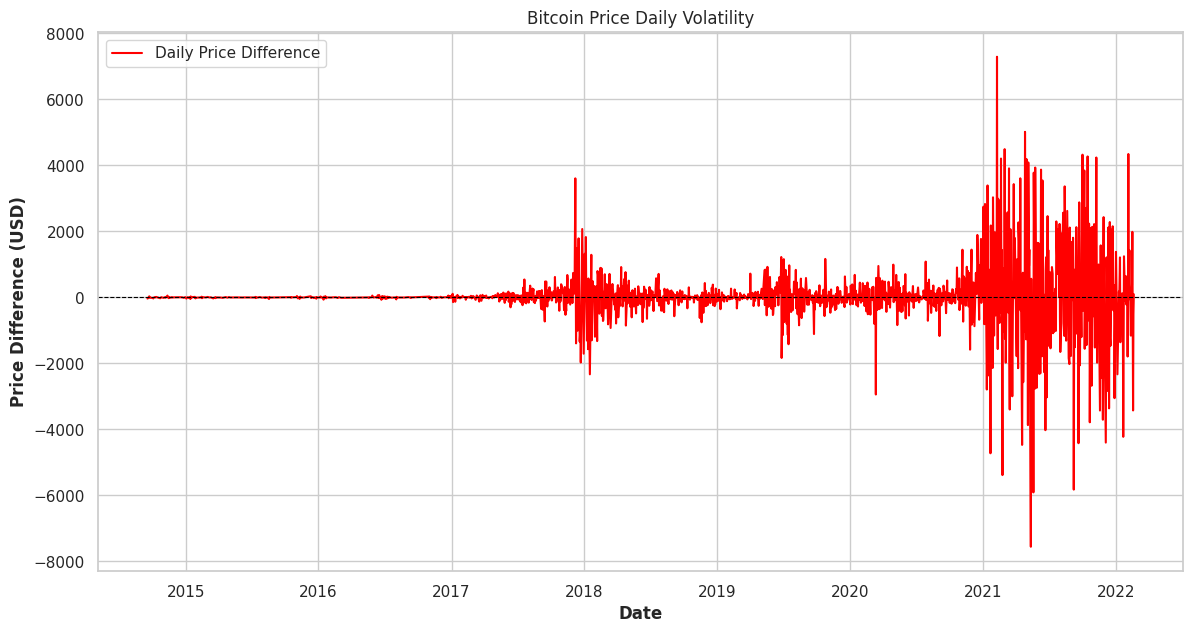

In [78]:
# Calculate daily price difference
df['Price Diff'] = df['close'].diff()

# Plot the price differences to see volatility
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['Price Diff'], label='Daily Price Difference', color='red')
plt.title('Bitcoin Price Daily Volatility')
plt.xlabel('Date')
plt.ylabel('Price Difference (USD)')
plt.axhline(0, linestyle='--', color='black', linewidth=0.8)
plt.legend(loc='best')
plt.show()

In [79]:
!pip install mplfinance

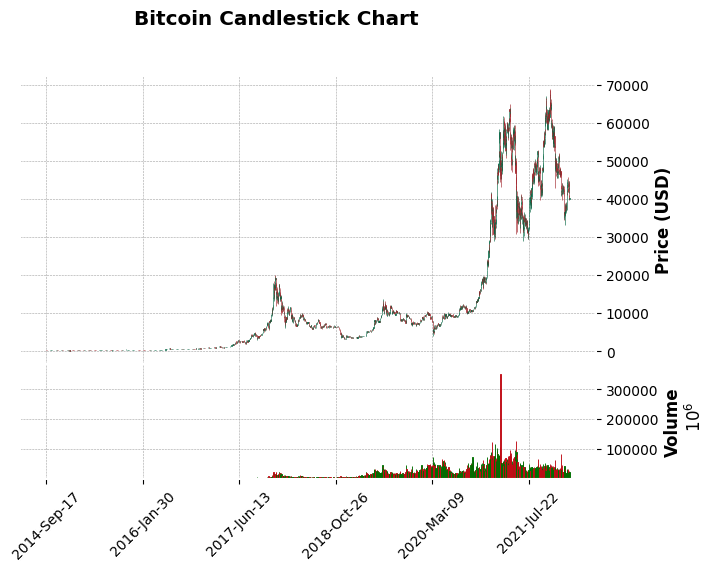

In [80]:
import mplfinance as mpf

# Prepare the data: set the 'date' as index
df_candle = df.set_index('date')

# Plot the candlestick chart
mpf.plot(df_candle, type='candle', style='charles', volume=True,
         title='Bitcoin Candlestick Chart',
         ylabel='Price (USD)', ylabel_lower='Volume')


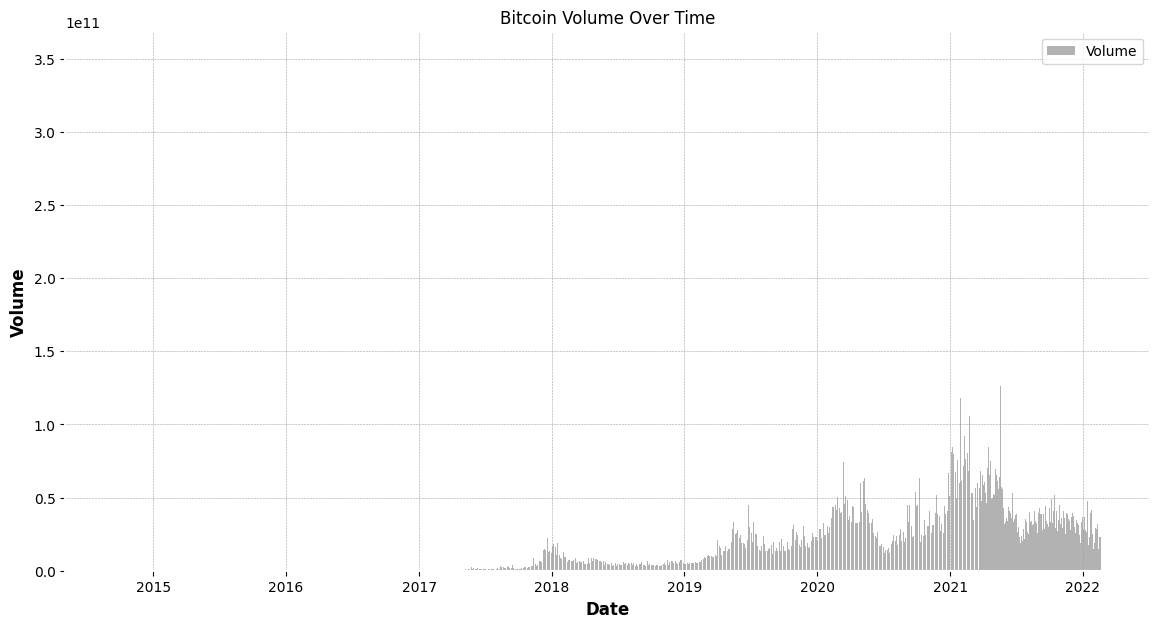

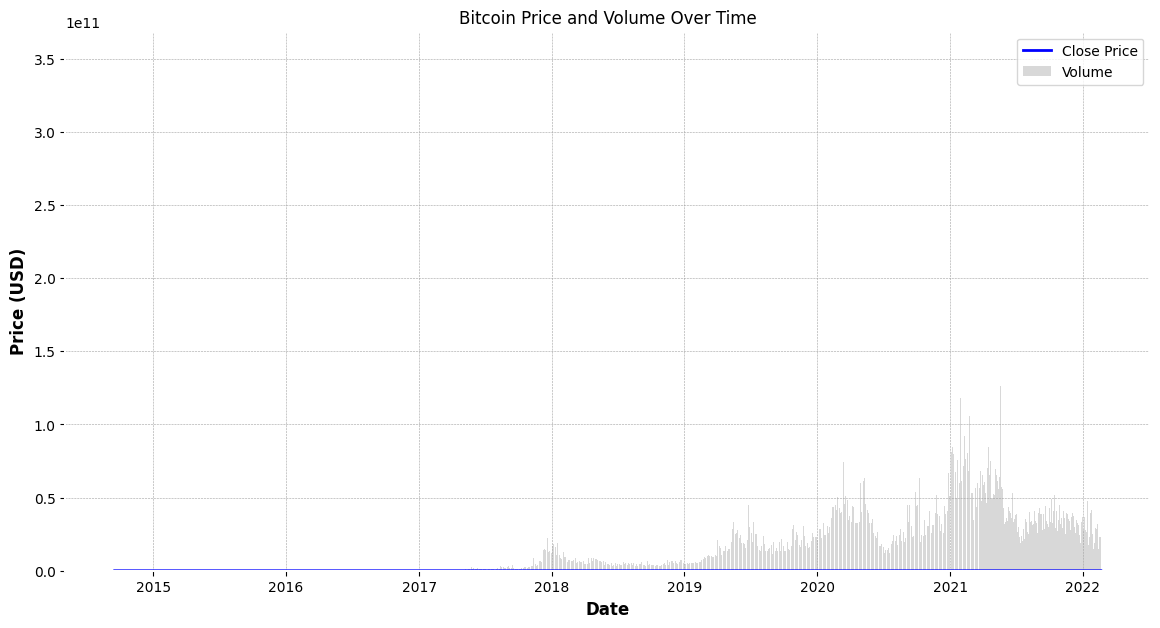

In [81]:
# Plot volume over time
plt.figure(figsize=(14, 7))
plt.bar(df['date'], df['volume'], label='Volume', color='grey', alpha=0.6)
plt.title('Bitcoin Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.show()

# Plot price vs volume
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.bar(df['date'], df['volume'], label='Volume', color='grey', alpha=0.3)
plt.title('Bitcoin Price and Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()


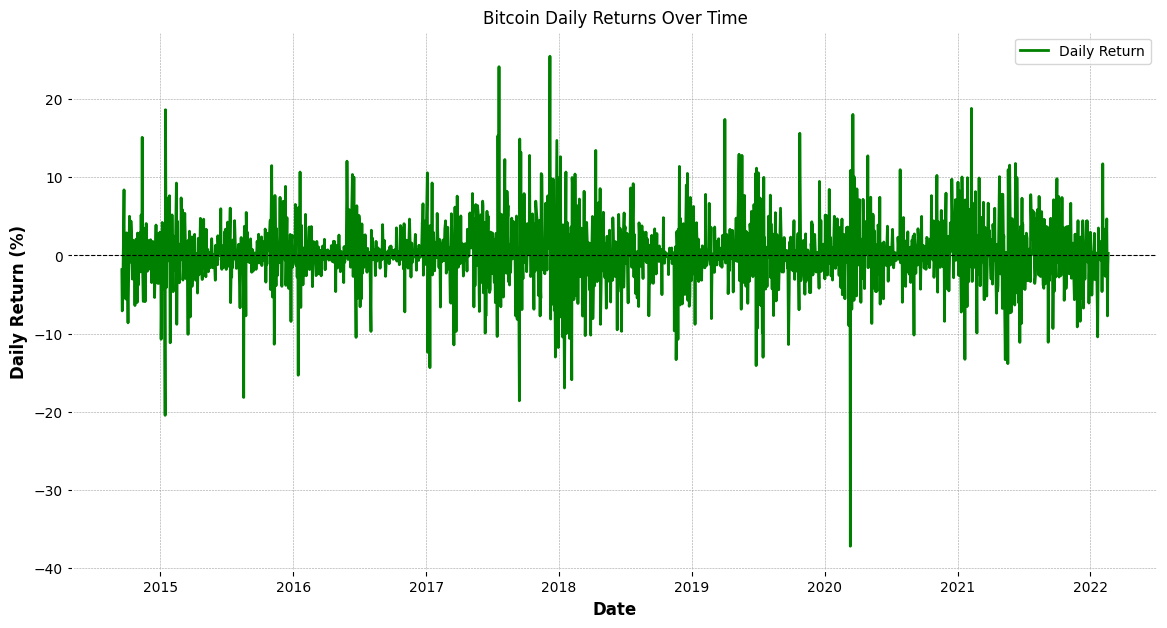

In [82]:
# Calculate daily returns
df['Daily Return'] = ((df['close'] - df['open']) / df['open']) * 100

# Plot daily returns over time
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['Daily Return'], label='Daily Return', color='green')
plt.title('Bitcoin Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(loc='best')
plt.show()


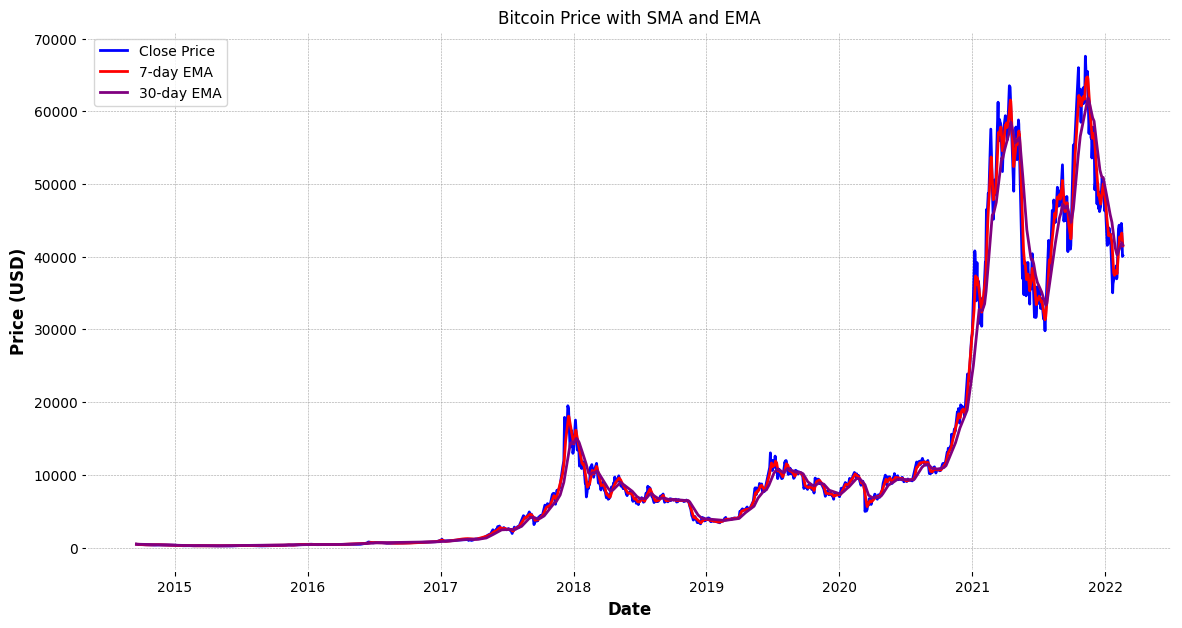

In [83]:
# Calculate 7-day and 30-day Exponential Moving Averages
df['EMA_7'] = df['close'].ewm(span=7, adjust=False).mean()
df['EMA_30'] = df['close'].ewm(span=30, adjust=False).mean()

# Plot the close price with the SMAs and EMAs
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['EMA_7'], label='7-day EMA', color='red')
plt.plot(df['date'], df['EMA_30'], label='30-day EMA', color='purple')
plt.title('Bitcoin Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()

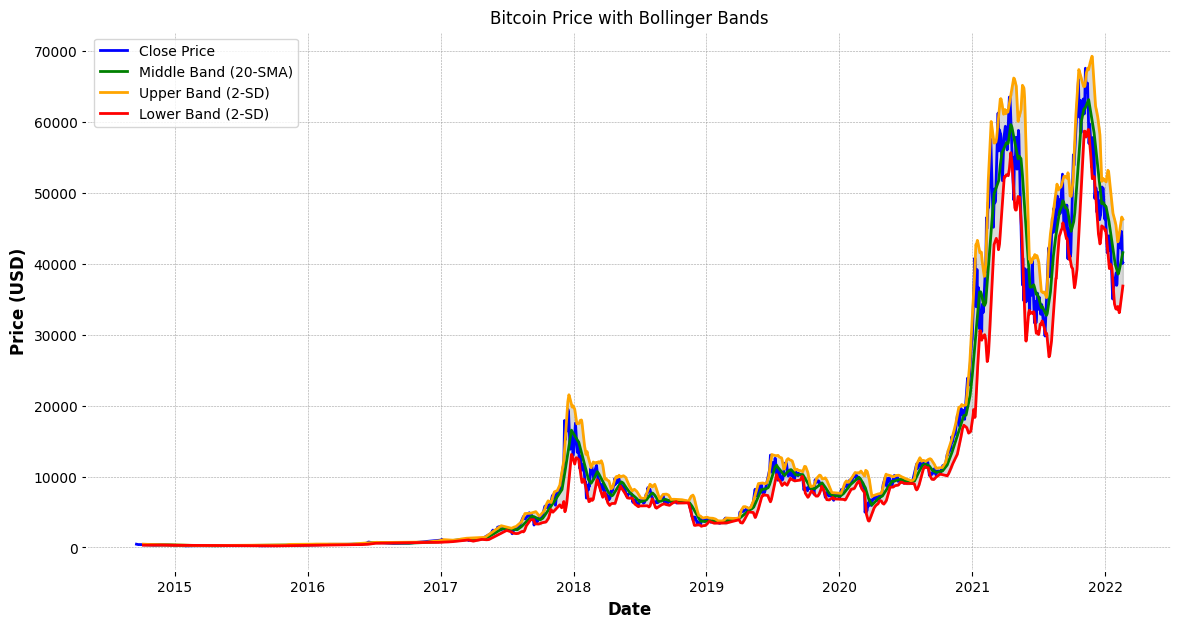

In [84]:
# Calculate the middle band (20-day SMA)
df['Middle Band'] = df['close'].rolling(window=20).mean()

# Calculate the upper and lower bands
df['Upper Band'] = df['Middle Band'] + 2 * df['close'].rolling(window=20).std()
df['Lower Band'] = df['Middle Band'] - 2 * df['close'].rolling(window=20).std()

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['Middle Band'], label='Middle Band (20-SMA)', color='green')
plt.plot(df['date'], df['Upper Band'], label='Upper Band (2-SD)', color='orange')
plt.plot(df['date'], df['Lower Band'], label='Lower Band (2-SD)', color='red')
plt.fill_between(df['date'], df['Upper Band'], df['Lower Band'], color='grey', alpha=0.3)
plt.title('Bitcoin Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.show()

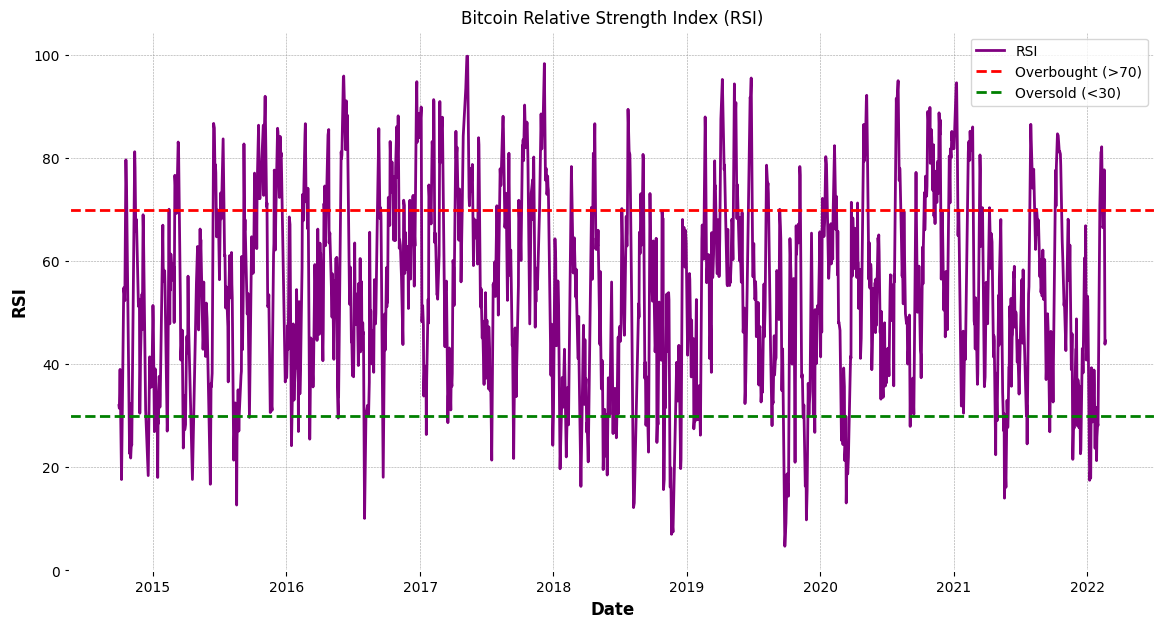

In [85]:
# Calculate gain and loss
df['Gain'] = df['Price Diff'].where(df['Price Diff'] > 0, 0)
df['Loss'] = -df['Price Diff'].where(df['Price Diff'] < 0, 0)

# Calculate the average gain and loss (14-day)
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# Calculate the RS (Relative Strength) and RSI
df['RS'] = df['Avg Gain'] / df['Avg Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Plot the RSI
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (>70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (<30)')
plt.title('Bitcoin Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='best')
plt.show()

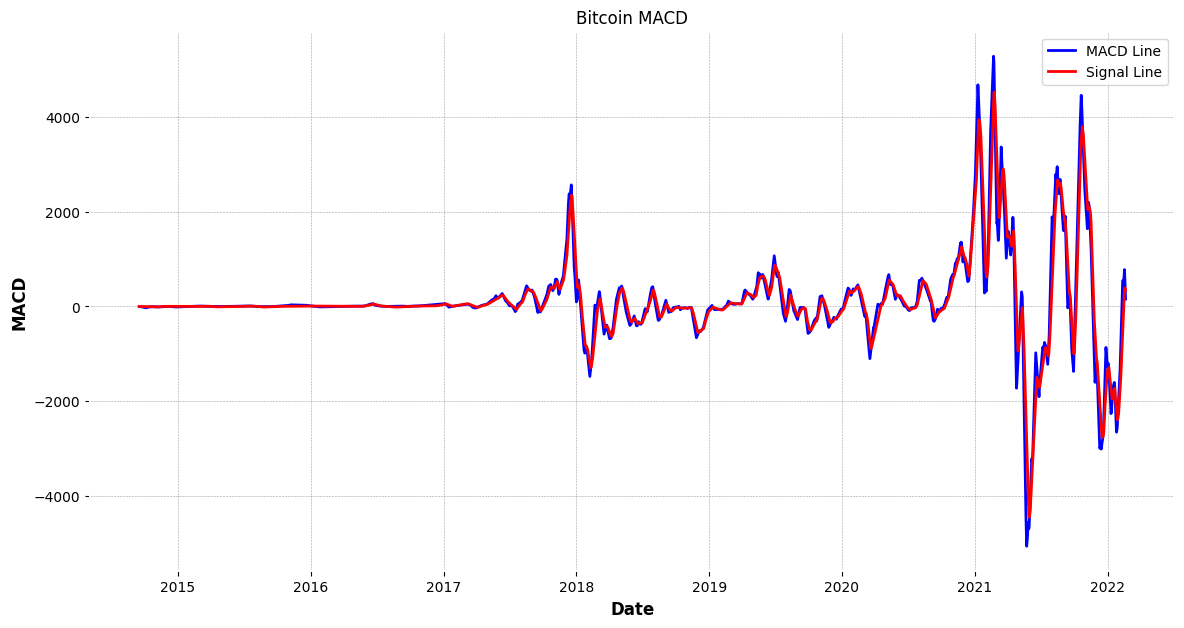

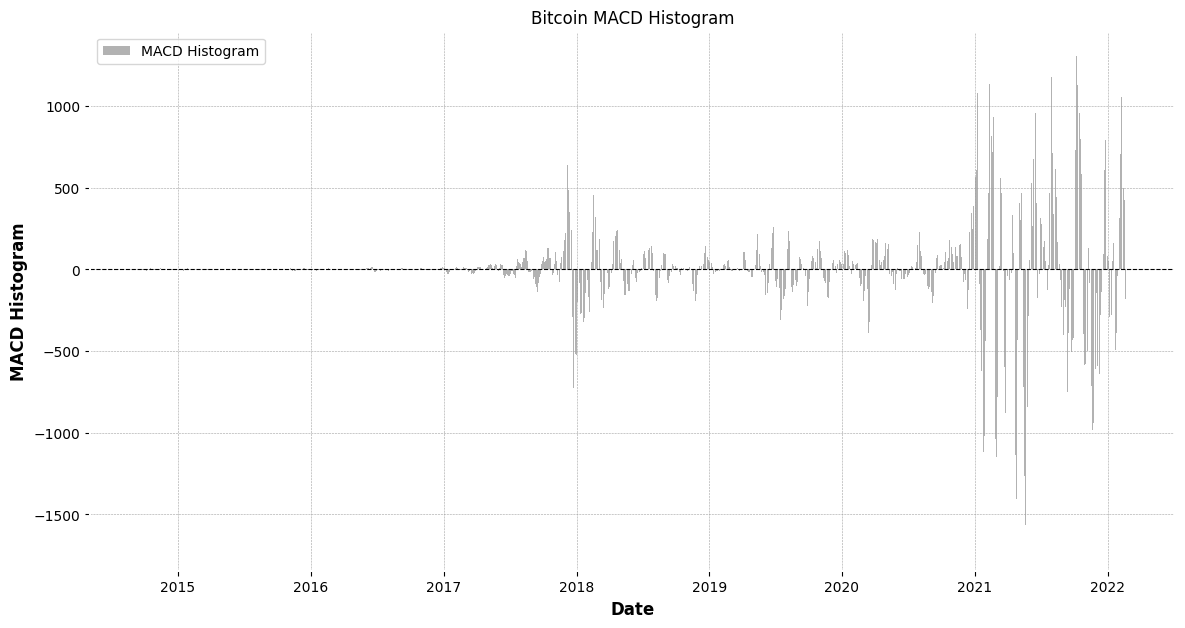

In [86]:
# Calculate the MACD line (12-day EMA - 26-day EMA)
df['MACD'] = df['close'].ewm(span=12, adjust=False).mean() - df['close'].ewm(span=26, adjust=False).mean()

# Calculate the Signal line (9-day EMA of the MACD line)
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot the MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['MACD'], label='MACD Line', color='blue')
plt.plot(df['date'], df['Signal Line'], label='Signal Line', color='red')
plt.title('Bitcoin MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend(loc='best')
plt.show()

# MACD Histogram (MACD line - Signal line)
df['MACD Histogram'] = df['MACD'] - df['Signal Line']

# Plot MACD Histogram
plt.figure(figsize=(14, 7))
plt.bar(df['date'], df['MACD Histogram'], label='MACD Histogram', color='grey', alpha=0.6)
plt.title('Bitcoin MACD Histogram')
plt.xlabel('Date')
plt.ylabel('MACD Histogram')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(loc='best')
plt.show()


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2713 non-null   datetime64[ns]
 1   open            2713 non-null   float64       
 2   high            2713 non-null   float64       
 3   low             2713 non-null   float64       
 4   close           2713 non-null   float64       
 5   adj close       2713 non-null   float64       
 6   volume          2713 non-null   int64         
 7   day             2713 non-null   int32         
 8   month           2713 non-null   int32         
 9   year            2713 non-null   int32         
 10  weekday         2713 non-null   object        
 11  7-day MA        2707 non-null   float64       
 12  30-day MA       2684 non-null   float64       
 13  Price Diff      2712 non-null   float64       
 14  Daily Return    2713 non-null   float64       
 15  EMA_

In [88]:
df[df['close'] == df['adj close']].shape, df.shape

((2713, 29), (2713, 29))

In [89]:
#df = df.drop(['adj close'], axis=1)

In [90]:
#data_grouped = df.groupby('year').mean()
#plt.subplots(figsize=(20,10))
#for i, col in enumerate(['open', 'high', 'low', 'close']):
#  plt.subplot(2,2,i+1)
#  data_grouped[col].plot.bar()
#plt.show()

In [91]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,date,open,high,low,close,adj close,volume,day,month,year,...,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,MACD,Signal Line,MACD Histogram,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17,9,2014,...,0.000000,-0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18,9,2014,...,0.000000,32.894013,NaN,NaN,NaN,NaN,-2.624024,-0.524805,-2.099219,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19,9,2014,...,0.000000,29.644012,NaN,NaN,NaN,NaN,-7.014744,-1.822793,-5.191951,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20,9,2014,...,14.108002,-0.000000,NaN,NaN,NaN,NaN,-9.249402,-3.308115,-5.941288,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21,9,2014,...,0.000000,10.082978,NaN,NaN,NaN,NaN,-11.699137,-4.986319,-6.712818,1


In [92]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

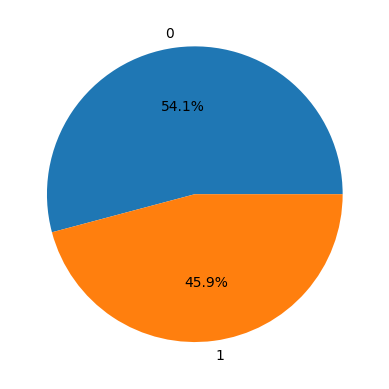

In [93]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2713 non-null   datetime64[ns]
 1   open            2713 non-null   float64       
 2   high            2713 non-null   float64       
 3   low             2713 non-null   float64       
 4   close           2713 non-null   float64       
 5   adj close       2713 non-null   float64       
 6   volume          2713 non-null   int64         
 7   day             2713 non-null   int32         
 8   month           2713 non-null   int32         
 9   year            2713 non-null   int32         
 10  weekday         2713 non-null   object        
 11  7-day MA        2707 non-null   float64       
 12  30-day MA       2684 non-null   float64       
 13  Price Diff      2712 non-null   float64       
 14  Daily Return    2713 non-null   float64       
 15  EMA_

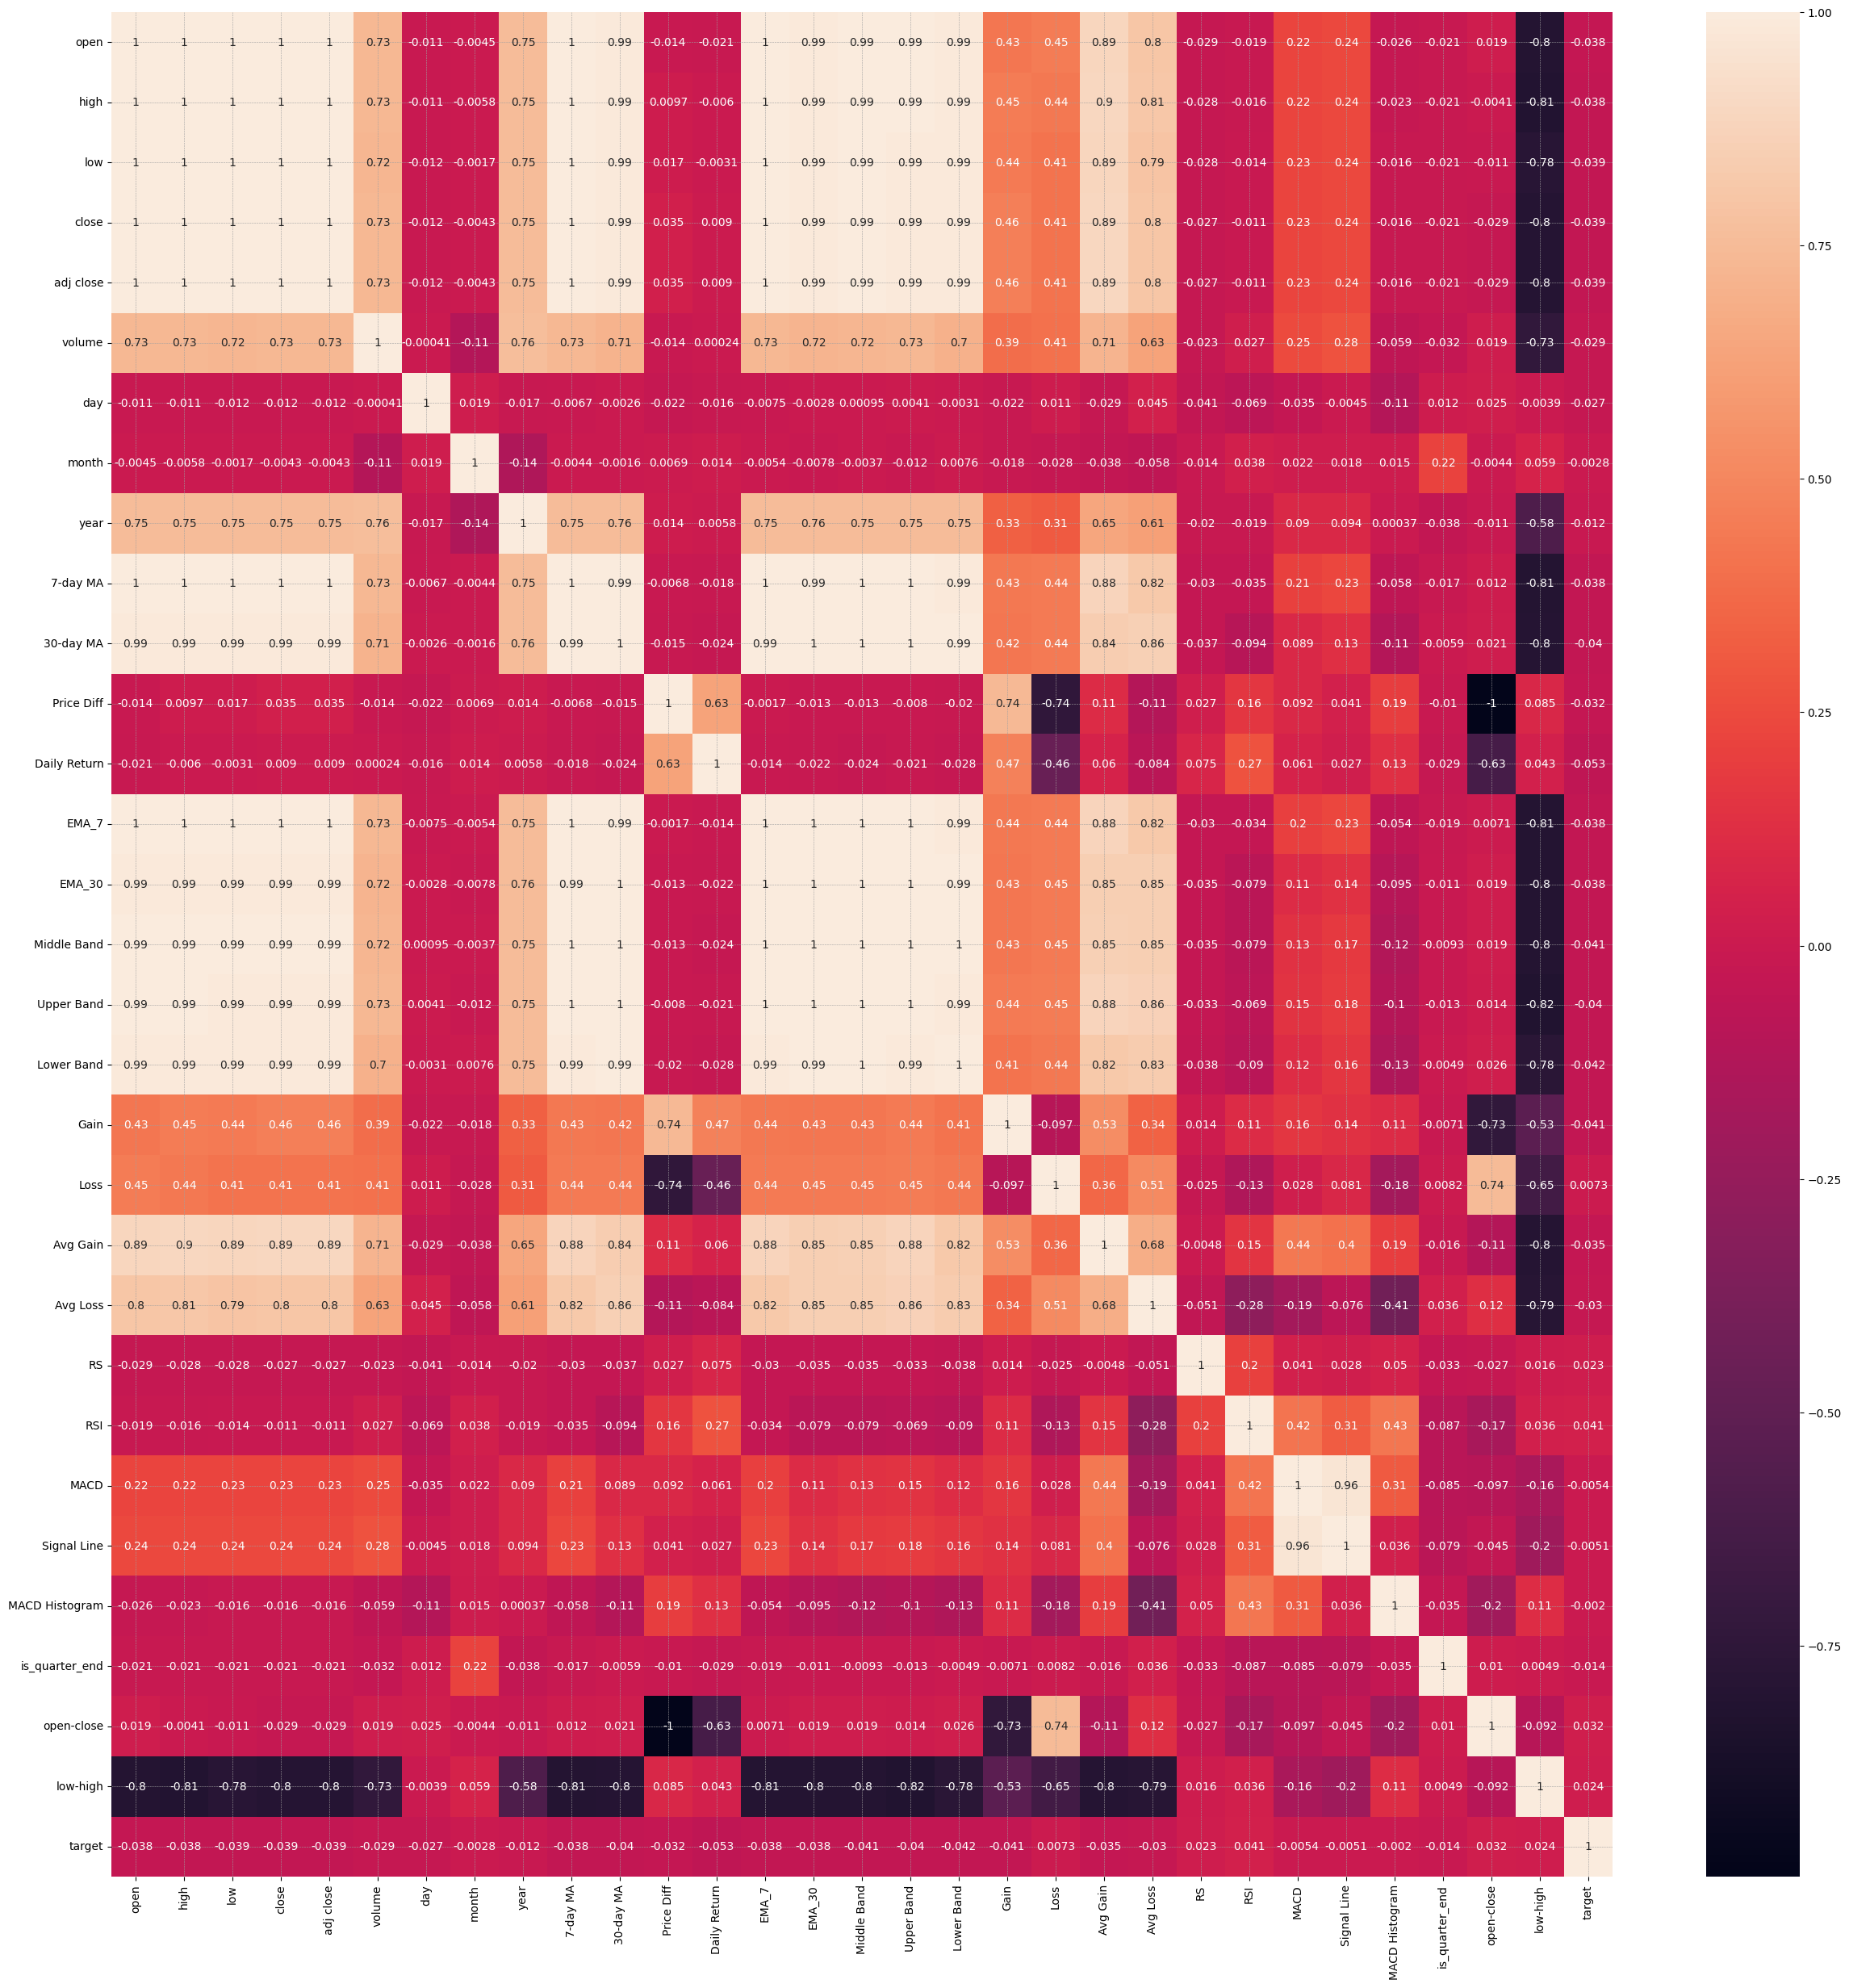

In [95]:
plt.figure(figsize=(30, 30))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop(columns=['date', 'weekday']).corr(), annot=True)
plt.show()

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['target','date', 'day','month', 'year', 'weekday']), df['target'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2170, 27) (543, 27) (2170,) (543,)


In [97]:
X_train

,open,high,low,close,adj close,volume,7-day MA,30-day MA,Price Diff,Daily Return,...,Avg Gain,Avg Loss,RS,RSI,MACD,Signal Line,MACD Histogram,is_quarter_end,open-close,low-high
445,389.554993,402.808990,387.088989,388.782990,388.782990,77762000,371.565290,347.590400,-0.166015,-0.198176,...,6.264143,1.675073,3.739624,78.901281,13.539268,10.328247,3.211021,1,0.772003,-15.720001
990,2493.719971,2581.909912,2423.570068,2515.350098,2515.350098,1514950016,2326.438581,2008.882983,26.800049,0.867384,...,68.504299,37.745719,1.814889,64.474623,200.054212,189.365447,10.688765,1,-21.630127,-158.339844
2517,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,36302664750,41306.057478,36365.802734,-757.683593,-1.741627,...,949.155692,345.732143,2.745350,73.300225,2322.003378,1786.703810,535.299567,0,776.320312,-1950.441407
2040,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,32447188386,6967.331543,6721.265625,161.480469,2.331736,...,99.037109,71.170131,1.391554,58.186191,57.157694,9.605863,47.551830,0,-165.373535,-180.709473
891,1172.709961,1200.390015,1131.959961,1173.680054,1173.680054,330759008,1107.915719,1021.705666,6.960083,0.082722,...,14.668862,1.454145,10.087619,90.980931,47.677530,35.512727,12.164803,0,-0.970093,-68.430054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,3913.047363,3926.597656,3891.904297,3906.717285,3906.717285,9469184841,3921.232910,3854.223657,-2.438965,-0.161768,...,16.386143,12.409720,1.320428,56.904504,43.796914,50.065385,-6.268471,1,6.330078,-34.693359
1095,3637.750000,3808.840088,3487.790039,3625.040039,3625.040039,1818400000,3816.445731,4246.706673,-12.479981,-0.349391,...,63.475708,131.599278,0.482341,32.539132,-106.062171,33.836951,-139.899122,1,12.709961,-321.050049
1130,5996.790039,6194.879883,5965.069824,6031.600098,6031.600098,2207099904,5764.507115,4751.866007,20.149903,0.580478,...,135.229283,20.607143,6.562253,86.776427,460.361829,392.643729,67.718100,0,-34.810059,-229.810059
1294,7102.259766,7530.939941,7072.490234,7456.109863,7456.109863,5499700224,7195.481375,8553.390316,372.310058,4.982218,...,70.235038,174.332171,0.402881,28.718093,-642.102276,-586.378858,-55.723417,0,-353.850097,-458.449707


In [98]:
columns = X_train.columns

In [99]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [100]:
X_train

,open,high,low,close,adj close,volume,7-day MA,30-day MA,Price Diff,Daily Return,...,Avg Gain,Avg Loss,RS,RSI,MACD,Signal Line,MACD Histogram,is_quarter_end,open-close,low-high
0,389.554993,402.808990,387.088989,388.782990,388.782990,7.776200e+07,371.565290,347.590400,-0.166015,-0.198176,...,6.264143,1.675073,3.739624,78.901281,13.539268,10.328247,3.211021,1.0,0.772003,-15.720001
1,2493.719971,2581.909912,2423.570068,2515.350098,2515.350098,1.514950e+09,2326.438581,2008.882983,26.800049,0.867384,...,68.504299,37.745719,1.814889,64.474623,200.054212,189.365447,10.688765,1.0,-21.630127,-158.339844
2,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10,41306.057478,36365.802734,-757.683593,-1.741627,...,949.155692,345.732143,2.745350,73.300225,2322.003378,1786.703810,535.299567,0.0,776.320312,-1950.441407
3,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,3.244719e+10,6967.331543,6721.265625,161.480469,2.331736,...,99.037109,71.170131,1.391554,58.186191,57.157694,9.605863,47.551830,0.0,-165.373535,-180.709473
4,1172.709961,1200.390015,1131.959961,1173.680054,1173.680054,3.307590e+08,1107.915719,1021.705666,6.960083,0.082722,...,14.668862,1.454145,10.087619,90.980931,47.677530,35.512727,12.164803,0.0,-0.970093,-68.430054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,3913.047363,3926.597656,3891.904297,3906.717285,3906.717285,9.469185e+09,3921.232910,3854.223657,-2.438965,-0.161768,...,16.386143,12.409720,1.320428,56.904504,43.796914,50.065385,-6.268471,1.0,6.330078,-34.693359
2166,3637.750000,3808.840088,3487.790039,3625.040039,3625.040039,1.818400e+09,3816.445731,4246.706673,-12.479981,-0.349391,...,63.475708,131.599278,0.482341,32.539132,-106.062171,33.836951,-139.899122,1.0,12.709961,-321.050049
2167,5996.790039,6194.879883,5965.069824,6031.600098,6031.600098,2.207100e+09,5764.507115,4751.866007,20.149903,0.580478,...,135.229283,20.607143,6.562253,86.776427,460.361829,392.643729,67.718100,0.0,-34.810059,-229.810059
2168,7102.259766,7530.939941,7072.490234,7456.109863,7456.109863,5.499700e+09,7195.481375,8553.390316,372.310058,4.982218,...,70.235038,174.332171,0.402881,28.718093,-642.102276,-586.378858,-55.723417,0.0,-353.850097,-458.449707


In [101]:
#!pip install imblearn

In [102]:
numerical_cols = X_train.columns

# Calculate IQR for all numerical columns
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (X_train[numerical_cols] < lower_bound) | (X_train[numerical_cols] > upper_bound)
print("Outliers detected:\n", X_train[outliers.any(axis=1)])

# Cap outliers at 1st and 99th percentiles for all numerical columns
for col in numerical_cols:
    lower_percentile = X_train[col].quantile(0.01)  # 1st percentile
    upper_percentile = X_train[col].quantile(0.99)  # 99th percentile

    # Apply capping
    X_train[col] = np.where(X_train[col] < lower_percentile, lower_percentile, X_train[col])
    X_train[col] = np.where(X_train[col] > upper_percentile, upper_percentile, X_train[col])

# Display the DataFrame after outliers have been capped
print("Data after capping:\n", X_train.head())

Outliers detected:
               open          high           low         close     adj close  \
2     44574.437500  45282.351563  43331.910156  43798.117188  43798.117188   
4      1172.709961   1200.390015   1131.959961   1173.680054   1173.680054   
5      8612.809570   8682.009766   8449.099609   8495.780273   8495.780273   
6     40788.640625  41436.351563  38980.875000  40254.546875  40254.546875   
9      7991.885254   8117.925781   7965.976074   8052.543945   8052.543945   
...            ...           ...           ...           ...           ...   
2162   7051.750000   7850.700195   6048.259766   7754.000000   7754.000000   
2164  11773.588867  11778.299805  11189.850586  11366.134766  11366.134766   
2166   3637.750000   3808.840088   3487.790039   3625.040039   3625.040039   
2167   5996.790039   6194.879883   5965.069824   6031.600098   6031.600098   
2168   7102.259766   7530.939941   7072.490234   7456.109863   7456.109863   

            volume      7-day MA     30-day

In [103]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [104]:
X_train

,open,high,low,close,adj close,volume,7-day MA,30-day MA,Price Diff,Daily Return,...,Avg Gain,Avg Loss,RS,RSI,MACD,Signal Line,MACD Histogram,is_quarter_end,open-close,low-high
0,389.554993,402.808990,387.088989,388.782990,388.782990,7.776200e+07,371.565290,347.590400,-0.166015,-0.198176,...,6.264143,1.675073,3.739624,78.901281,13.539268,10.328247,3.211021,1.000000,0.772003,-15.720001
1,2493.719971,2581.909912,2423.570068,2515.350098,2515.350098,1.514950e+09,2326.438581,2008.882983,26.800049,0.867384,...,68.504299,37.745719,1.814889,64.474623,200.054212,189.365447,10.688765,1.000000,-21.630127,-158.339844
2,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,3.630266e+10,41306.057478,36365.802734,-757.683593,-1.741627,...,949.155692,345.732143,2.745350,73.300225,2322.003378,1786.703810,535.299567,0.000000,776.320312,-1950.441407
3,7092.291504,7269.956543,7089.247070,7257.665039,7257.665039,3.244719e+10,6967.331543,6721.265625,161.480469,2.331736,...,99.037109,71.170131,1.391554,58.186191,57.157694,9.605863,47.551830,0.000000,-165.373535,-180.709473
4,1172.709961,1200.390015,1131.959961,1173.680054,1173.680054,3.307590e+08,1107.915719,1021.705666,6.960083,0.082722,...,14.668862,1.454145,10.087619,90.980931,47.677530,35.512727,12.164803,0.000000,-0.970093,-68.430054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,255.100694,262.853033,252.176839,256.945392,256.945392,4.362206e+07,243.620393,235.878229,1.754764,0.684225,...,2.324404,0.548703,5.360194,84.077966,3.809135,1.141156,2.667979,0.641254,-1.844698,-10.676194
2326,1208.469773,1210.800271,1197.190190,1201.609700,1201.609700,2.888387e+08,1191.436135,1102.613626,-7.028993,-0.557540,...,14.656717,3.398916,4.456405,81.338478,29.780828,16.126070,13.654758,0.053505,6.860072,-13.610081
2327,265.542190,266.654042,259.405573,260.630143,260.630143,2.147496e+07,261.596193,252.937963,-5.136606,-1.862129,...,2.274128,2.284446,0.988226,49.464978,3.447014,2.989936,0.457078,0.541367,4.912047,-7.248469
2328,3910.481547,3942.402474,3897.534082,3916.018422,3916.018422,9.598757e+09,3867.458595,3791.013670,5.365384,0.142516,...,29.264691,30.826056,1.020864,49.632968,48.862797,56.176966,-7.314169,1.000000,-5.536875,-44.868392


In [105]:
#features = df[['open-close', 'low-high', 'is_quarter_end']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
X_train

array([[-6.85130384e-01, -6.84830715e-01, -6.85439421e-01, ...,
         1.43165145e+00,  1.50720965e-02,  5.73139639e-01],
       [-5.53121732e-01, -5.51743425e-01, -5.53587476e-01, ...,
         1.43165145e+00, -1.98310460e-02,  4.38684165e-01],
       [ 2.08688932e+00,  2.05616059e+00,  2.09502255e+00, ...,
        -7.16812464e-01,  1.22339796e+00, -1.25082733e+00],
       ...,
       [-6.92910555e-01, -6.93146297e-01, -6.93706282e-01, ...,
         4.46295656e-01,  2.15223996e-02,  5.81126212e-01],
       [-4.64238594e-01, -4.68652153e-01, -4.58155692e-01, ...,
         1.43165145e+00,  5.24268915e-03,  5.45659867e-01],
       [ 2.62762792e+00,  2.64161697e+00,  2.68845589e+00, ...,
        -3.24161060e-04, -1.50125488e+00, -1.69634693e+00]])

In [107]:
!pip install catboost

In [108]:
#!pip install lightgbm

In [45]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, BaggingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier  # Ensure you have catboost installed
from lightgbm import LGBMClassifier  # Ensure you have lightgbm installed
from sklearn.metrics import (roc_auc_score, accuracy_score, recall_score,
                             precision_score, f1_score)

In [ ]:
models = {
    'Logistic Regression': (LogisticRegression(), {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300]
    }),
    'Logistic Regression CV': (LogisticRegressionCV(), {
        'Cs': [10, 20, 30],
        'cv': [3, 5, 10],
        'max_iter': [100, 200, 300]
    }),
    #'SVC': (SVC(probability=True), {
    #    'C': np.logspace(-4, 4, 20),
    #    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 4, 20))
    #}),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7, 9],
        'subsample': [0.5, 0.7, 1.0]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.5, 0.7, 1.0]
    }),
    'K-Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    'Bagging': (BaggingClassifier(), {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0]
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'Linear Discriminant Analysis': (LinearDiscriminantAnalysis(), {
        'solver': ['svd', 'lsqr', 'eigen'],
        'priors': [None, [0.5, 0.5]]
    }),
    'Extra Trees': (ExtraTreesClassifier(), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    'CatBoost': (CatBoostClassifier(silent=True), {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [3, 5, 7]
    }),
    #'LightGBM': (LGBMClassifier(), {
    #    'n_estimators': [100, 200],
    #    'learning_rate': [0.01, 0.1],
    #    'num_leaves': [31, 63, 127],
    #    'max_depth': [-1, 10, 20]
    #})
}

# Iterate over models and perform RandomizedSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, (model, params) in models.items():
    print(f'Running RandomizedSearchCV for {model_name}...')

    # Set up RandomizedSearchCV
    search = RandomizedSearchCV(model, params, n_iter=100, cv=skf, scoring='f1_score', random_state=42)

    # Fit the model
    search.fit(X_train, Y_train)

    # Best model and parameters
    best_model = search.best_estimator_
    print(f'Best parameters for {model_name}: {search.best_params_}')

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_test)

    # Calculate metrics
    train_auc = roc_auc_score(Y_train, best_model.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1])

    accuracy = accuracy_score(Y_test, y_val_pred)
    recall = recall_score(Y_test, y_val_pred)
    precision = precision_score(Y_test, y_val_pred)
    f1 = f1_score(Y_test, y_val_pred)

    # Print metrics
    print(f'Training AUC: {train_auc:.4f}')
    print(f'Validation AUC: {val_auc:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()
#Naive Bayes is the best

Running RandomizedSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'solver': 'saga', 'max_iter': 100, 'C': 0.004832930238571752}
Training AUC: 0.5715
Validation AUC: 0.5202
Accuracy: 0.5212
Recall: 0.5526
Precision: 0.5753
F1 Score: 0.5638

Running RandomizedSearchCV for Logistic Regression CV...
Best parameters for Logistic Regression CV: {'max_iter': 100, 'cv': 10, 'Cs': 10}
Training AUC: 0.5744
Validation AUC: 0.5224
Accuracy: 0.5230
Recall: 0.5362
Precision: 0.5801
F1 Score: 0.5573

Running RandomizedSearchCV for XGBoost...
Best parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Training AUC: 0.6906
Validation AUC: 0.5289
Accuracy: 0.5562
Recall: 0.6316
Precision: 0.5981
F1 Score: 0.6144

Running RandomizedSearchCV for Random Forest...
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10}
Training AUC: 0.9867
Validation AUC: 0.5294
Acc

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(Y_test, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

print()

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [109]:
# Reshaping the train and test data to include the time_step dimension
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Shape will be (2330, 1, 27)
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Shape will be (543, 1, 27)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - loss: 1.2274 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.5963 - val_loss: 0.5874 - learning_rate: 0.0010
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4902 - val_loss: 0.5835 - learning_rate: 0.0010
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4303 - val_loss: 0.5616 - learning_rate: 0.0010
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3906 - val_loss: 0.5342 - learning_rate: 0.0010
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.3406 - val_loss: 0.4930 - learning_rate: 0.0010
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3509 - val_loss: 0.4427 - learning_rate: 0.0010
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3246 - val_loss: 0.4277 - learning_rate: 0.0010
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.3146 - val_loss: 0.3970 - learning_rate: 0.0010
Epoch 10/50
37/37

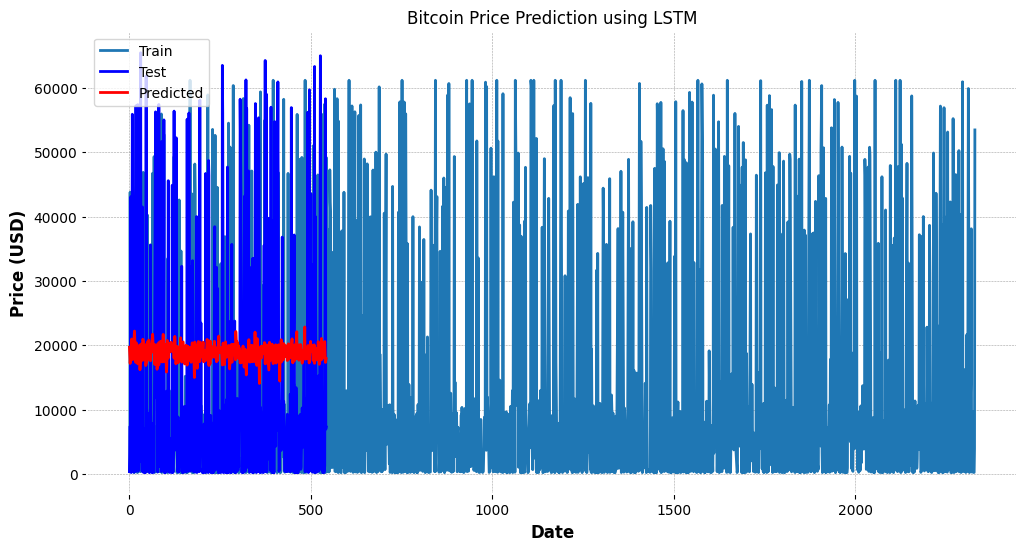

In [110]:
# Build the LSTM model
model = Sequential()

# First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=150, return_sequences=True, input_shape=(1, 27))))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Increased dropout to prevent overfitting

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fourth Bidirectional LSTM layer (added more depth)
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layer with ReLU activation
model.add(Dense(units=50, activation='relu'))

# Output layer with one unit for the final prediction
model.add(Dense(units=1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Learning rate scheduler to reduce learning rate when a metric has stopped improving
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, Y_test), callbacks=[lr_scheduler])

# Make predictions with the reshaped test data
predictions = model.predict(X_test_reshaped)

# Create a temporary array with the same shape as X_train (or X_test) and place the predictions in the 5th column
predicted_scaled = np.zeros((predictions.shape[0], X_train.shape[1]))  # Shape (543, 27)
predicted_scaled[:, 4] = predictions[:, 0]

# Inverse transform the entire array (as scaler was fit on the full dataset)
predicted_inverse = scaler.inverse_transform(predicted_scaled)

# Extract the inverse transformed 'close' predictions
predictions = predicted_inverse[:, 4]

# Inverse transform train and test data (close price only)
train_data = scaler.inverse_transform(X_train)[:, 4].reshape(-1, 1)
test_data = scaler.inverse_transform(X_test)[:, 4].reshape(-1, 1)

# Prepare test data for plotting
test_data = pd.DataFrame(test_data, columns=['close'])
test_data['Predictions'] = predictions

# Plot the results
plt.figure(figsize=(12,6))
plt.scatter(range(len(train_data)), train_data, label="Train")
plt.scatter(test_data.index, test_data['close'], label="Test", color="blue")
plt.scatter(test_data.index, test_data['Predictions'], label="Predicted", color="red")
plt.title("Bitcoin Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc="upper left")
plt.show()

In [118]:
# Build the LSTM model
model = Sequential()

# First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=150, return_sequences=True, input_shape=(1, 27))))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Increased dropout to prevent overfitting

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fourth Bidirectional LSTM layer (added more depth)
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layer with ReLU activation
model.add(Dense(units=50, activation='relu'))

# Output layer with one unit for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler to reduce learning rate when a metric has stopped improving
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train_reshaped, Y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, Y_test), callbacks=[lr_scheduler])

# Make predictions with the reshaped test data
predictions = model.predict(X_test_reshaped)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary class predictions

# Calculate metrics
train_auc = roc_auc_score(Y_train, model.predict(X_train_reshaped))
val_auc = roc_auc_score(Y_test, predictions)
accuracy = accuracy_score(Y_test, predicted_classes)
recall = recall_score(Y_test, predicted_classes)
precision = precision_score(Y_test, predicted_classes)
f1 = f1_score(Y_test, predicted_classes)

# Print metrics
print(f'Training AUC: {train_auc:.4f}')
print(f'Validation AUC: {val_auc:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.5081 - loss: 0.8215 - val_accuracy: 0.4401 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5140 - loss: 0.7594 - val_accuracy: 0.4401 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4975 - loss: 0.7568 - val_accuracy: 0.4401 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5189 - loss: 0.7350 - val_accuracy: 0.4641 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5198 - loss: 0.7273 - val_accuracy: 0.4457 - val_loss: 0.6988 - learning_rate: 0.0010
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5336 - loss: 0.7134 - val_accuracy: 0.4401 - val_loss: 0.7011 - learning_rate: 0.0010
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5354 - loss: 0.7098 - val_a